# 18.06 Fall 2018 pset 1 Solutions


# Search for the word "solution" at the end of each problem

## Problem 1

Which of these matrix functions  make sense (assume $m \ne n$)?
1. f(x) = W * x      (where W is an m x n matrix, x is a length n vector)
1. f(x) = W * x + b   (where W is an m x n matrix, x is a length n vector, b is a length n vector)
1. f(x) = W \* W * x (where W is an m x n matrix, x is a length n vector)
1. f(x) = W * x  + b (where W is an m x n matrix, x is a length n vector, b is a length m vector)
1. f(x) = x * W     (where W is an m x n matrix, x is a length n vector)
1. f(x) = sin.(W \* x) (where W is an m x n matrix, x is a length n vector and the "." means take the sine of element of the vector W*x)
1. f(x) = sin.(W) \* x  (where W is an m x n matrix, x is a length n vector)
1. f(x) = σ.(x) where (where σ is the [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function σ(t) = 1/(1+e^(-t)))

<br>
The "." is usually pronounced "dot" but if one thinks "point" one might remember it is a "pointwise" operation, i.e. applies seperately to every element.
<br><br><br><br><br><br><br>
Execute the commands in Julia to check your work.  While there will not be any computers on the exams, in the real world people check themselves all the time with a computer. (Shift + **enter** executes and moves to the next cell.)



In [1]:
m = 2
n = 4
W = rand(m,n)
x = rand(n)
bm = rand(m)
bn = rand(n); # final semicolon suppresses printing of output

In [2]:
W

2×4 Array{Float64,2}:
 0.57466   0.92845   0.366734  0.953269
 0.887694  0.121509  0.175309  0.519305

Notice W is a 2x4 arrray whose elements are Float64 (they have decimals) and it is a "2" dimensional **matrix**.

In [3]:
x

4-element Array{Float64,1}:
 0.647675 
 0.286339 
 0.0227731
 0.649898 

Notice x is a length 4 vector of Float64's and it is a "1" dimensional matrix. Humans often conflate a 4 vector with a 4x1 matrix.  Sometimes this is highly productive.  Julia usually makes the distinction between a 4 vector and a 4x1 matrix.

In [4]:
W*x

2-element Array{Float64,1}:
 1.26592 
 0.951218

In [5]:
W*x + bn

LoadError: [91mDimensionMismatch("dimensions must match")[39m

In [6]:
W*W*x

LoadError: [91mDimensionMismatch("A has dimensions (2,4) but B has dimensions (2,4)")[39m

In [7]:
W*x + bm

2-element Array{Float64,1}:
 1.65548
 1.75199

In [8]:
x * W  

LoadError: [91mDimensionMismatch("A has dimensions (4,1) but B has dimensions (2,4)")[39m

In [9]:
sin.(W*x)

2-element Array{Float64,1}:
 0.953885
 0.814124

In [10]:
sin.(W) * x

2-element Array{Float64,1}:
 1.11935 
 0.863558

Packages are software libraries that one tends to add on an "as-needed" basis so not to take up too much room on your computer.

Very likely you will need the Flux package for σ to be defined.

On your own computer you should uncomment out the Pkg.add line once.  It will load Flux on your computer.
You will still need the using line for each session.

If you are using Juliabox, press the packages-->yours button on top of the first screen add flux as described
[here](http://docs.juliabox.com/#Installing-packages-1)

In [11]:
# Pkg.add("Flux")
using Flux   ### Let's load the Flux package which contains σ, 

In [12]:
## if the above Using Flux command takes you more than 2 minutes
## forget about it and just uncomment out the line below
## to define the sigmoid

σ(x) = 1/(1+e^(-x))

σ (generic function with 1 method)

In [13]:
σ.(W*x) # You can type \sigma+<tab> to get the greek letter sigma

2-element Array{Float64,1}:
 0.780044
 0.72136 

σ goes from 0 to 1.  It is known as an activation function in machine learning.
You can get help by typing question mark and a function name

In [14]:
? σ

"σ" can be typed by \sigma<tab>

search: σ



No documentation found.

`σ` is a `Function`.

```
# 1 method for generic function "σ":
σ(x) in Main at In[12]:5
```


## Solution

1. Yes, the dimensions are mxn * nx1, which makes sense since the middle dimensions match
2. No, W*x is mx1 dimensional, which can't be added to b which is nx1 dimensional
3. No, W*x is mxn * mxn dimensional, which doesn't make sense since the middle dimensions don't match
4. Yes, W*x is mx1 dimensional, which can be added to b which is also mx1 dimensional
5. No, the dimensions are nx1 * mxn, which doesn't make sense since the middle dimensions don't match
6. Yes, W*x makes sense and then we can apply sine to each element
7. Yes, sin.(W) is mxn dimensional, which can multiply the nx1 dimensional x
8. Yes, we can apply the sigmoid function to each element of x

## Problem 2 ( A little complexity)

Suppose W is nxn,  x is a vector of length n, b is a vector of length n.

1. What do you expect is the comparison between the time spent computing W*x when n is 10000 vs n is 20000?
1. What do you expect is the comparison between the time spent computing W*x+b when n is 10000 vs n is 20000?
1. What do you expect is the comparison between the time spent computing σ.(W*x+b) when n is 10000 vs n is 20000?
    
    <br><br><br><br><br><br><br>
    
    You can use the code in Julia below to verify or help with your answer.

In [15]:
#add BenchmarkTools
using BenchmarkTools

In [16]:
n1=10000
n2=20000
W1 = rand(n1,n1); x1=rand(n1); b1 = rand(n1)
W2 = rand(n2,n2); x2=rand(n2); b2 = rand(n2)
f1(x) = W1*x
f2(x) = W2*x
@benchmark f1(x1)

BenchmarkTools.Trial: 
  memory estimate:  78.20 KiB
  allocs estimate:  2
  --------------
  minimum time:     324.893 ms (0.00% GC)
  median time:      486.257 ms (0.00% GC)
  mean time:        452.210 ms (0.00% GC)
  maximum time:     501.649 ms (0.00% GC)
  --------------
  samples:          12
  evals/sample:     1

In [17]:
@benchmark f2(x2)

BenchmarkTools.Trial: 
  memory estimate:  156.33 KiB
  allocs estimate:  2
  --------------
  minimum time:     1.456 s (0.00% GC)
  median time:      1.502 s (0.00% GC)
  mean time:        1.515 s (0.00% GC)
  maximum time:     1.599 s (0.00% GC)
  --------------
  samples:          4
  evals/sample:     1

In [18]:
f3(x) = W1*x + b1
f4(x) = W2*x + b2
@benchmark f3(x1)

BenchmarkTools.Trial: 
  memory estimate:  156.41 KiB
  allocs estimate:  4
  --------------
  minimum time:     397.900 ms (0.00% GC)
  median time:      403.735 ms (0.00% GC)
  mean time:        429.576 ms (0.00% GC)
  maximum time:     497.508 ms (0.00% GC)
  --------------
  samples:          12
  evals/sample:     1

In [19]:
@benchmark f4(x2)

BenchmarkTools.Trial: 
  memory estimate:  312.66 KiB
  allocs estimate:  4
  --------------
  minimum time:     1.379 s (0.00% GC)
  median time:      1.398 s (0.00% GC)
  mean time:        1.395 s (0.00% GC)
  maximum time:     1.404 s (0.00% GC)
  --------------
  samples:          4
  evals/sample:     1

In [20]:
f3(x) = σ.(W1*x + b1)
f4(x) = σ.(W2*x + b2)
@benchmark f3(x1)

BenchmarkTools.Trial: 
  memory estimate:  235.64 KiB
  allocs estimate:  30
  --------------
  minimum time:     306.583 ms (0.00% GC)
  median time:      402.435 ms (0.00% GC)
  mean time:        419.296 ms (0.00% GC)
  maximum time:     546.828 ms (0.00% GC)
  --------------
  samples:          12
  evals/sample:     1

In [21]:
@benchmark f4(x2)

BenchmarkTools.Trial: 
  memory estimate:  470.02 KiB
  allocs estimate:  30
  --------------
  minimum time:     1.397 s (0.00% GC)
  median time:      1.403 s (0.00% GC)
  mean time:        1.404 s (0.00% GC)
  maximum time:     1.413 s (0.00% GC)
  --------------
  samples:          4
  evals/sample:     1

## Solution

1. W*x is an nx1 matrix. There are n entries, and to compute each entry, we do n scalar multiplications and (n-1) scalar additions. Thus, we have to do n(n + (n-1)) = 2n^2 - n computations to compute W*x. Since the number of computations grows as n^2, and 20000 is double that of 10000, we expect the n=20000 computation to take roughly 2^2 = 4 times as long as the n=10000 computation. 

2. To compute W*x, we need 2n^2 - n computations. To then add this to b, we need another n scalar additions, for a total of 2n^2 computations. The order of growth is still n^2, so again we expect the n=20000 computation to take roughly 4 times as long as the n=10000 computation. 

3. We calculated that W*x+b required 2n^2 scalar computations. W*x+b is an nx1 matrix, so to apply sigma to the computation time a term that grows as n. The n^2 still dominates, so the order of growth is still n^2 and we expect the n=20000 computation to take roughly 4 times as long as the n=10000 computation. 

## Problem 3 Vectors


(a)  SUM OF VECTORS: What is the sum V of the twelve unit vectors that go from the center of a clock to the hours 1:00, 2:00, ..., 12:00?

<br><br><br><br><br><br>
<img src="http://2.bp.blogspot.com/-Y5mnXTd33z0/VDGXB-3qE3I/AAAAAAAASl0/mD1sb0gaLtU/s1600/clock-face-time4.jpg" size=10>
(b)  (SUBTRACTING VECTORS) In the sum of vectors above, if the 2:00 vector is removed, you can show that the remaining vectors add to 8:00. This is because subtracting a vector is the same as adding 
<span style="border-bottom: 1px solid black; padding-left: 200px">&nbsp;</span> ? <br>
Write your answer as a number from 1 through 4 below:<br>
1. An Opposite Vector
2. An Orthogonal Vector
3. A Parallel Vector
4. Zero

## Solution 

1. The vectors come in pairs v and -v. For example, the vector for 1:00 is minus that for 7:00. Therefore, since each pair v + (-v) sums to 0, the sum of all the vectors is also 0. 

2. An opposite vector 

## Problem 4  Elimination sometimes breaks down
We would like you to use elimination to solve the following linear system of two equations:

$ax + 3y = −3$

$4x + 6y = 6$


For which number $a$ does elimination break down permanently? <br><br><br>

For which number $a$ does elimination break down temporarily?<br><br><br>

SOLVING THE NON-SINGULAR SYSTEM

Fix the temporary breakdown above by a row exchange and then solve.

Enter the value of $x$: <br>

Enter the value of  y:

## Solution 

If $a=2$, then we get a permanant failure, since our first elimination step with $a$ as the pivot turns the second equation into $0x + 0y = 12$, and there is no second pivot. 

If $a=0$, then we get a temporary failure. $a=0$ cannot be used as our first pivot, but if we permute the two equations, the system of linear equations is then upper triangular and we can perform back substitution from here. 

## Problem 5  Plot Solutions of Linear Systems

 Consider the linear system for various values of p and q that you can manipulate


$x + y = p$

$-x + 3y = q$
    

Where is the solution when $p=7$ and $q=1$?  Draw the graph and give the solution. <br><br>

In [1]:
# Pkg.add PyPlot
# Pkg.add Interact
using PyPlot, Interact

Interact.Options{:SelectionSlider,Any}(1: "input" = 7.0 Any , "p", 7.0, "7.0", 15, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0,"1.5"=>1.5,"2.0"=>2.0,"2.5"=>2.5,"3.0"=>3.0,"3.5"=>3.5,"4.0"=>4.0,"4.5"=>4.5…), Dict{Any,Any}(Pair{Any,Any}(5.5, "5.5"),Pair{Any,Any}(6.5, "6.5"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(10.5, "10.5"),Pair{Any,Any}(4.5, "4.5"),Pair{Any,Any}(11.0, "11.0"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(7.0, "7.0"),Pair{Any,Any}(8.5, "8.5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(3: "input-2" = 7.0 Any , "q", 7.0, "7.0", 15, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0,"1.5"=>1.5,"2.0"=>2.0,"2.5"=>2.5,"3.0"=>3.0,"3.5"=>3.5,"4.0"=>4.0,"4.5"=>4.5…), Dict{Any,Any}(Pair{Any,Any}(5.5, "5.5"),Pair{Any,Any}(6.5, "6.5"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(10.5, "10.5"),Pair{Any,Any}(4.5, "4.5"),Pair{Any,Any}(11.0, "11.0"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(7.0, "7.0"),Pair{Any,Any}(8.5, "8.5")…)), Any[], Any[], true, "horizontal")

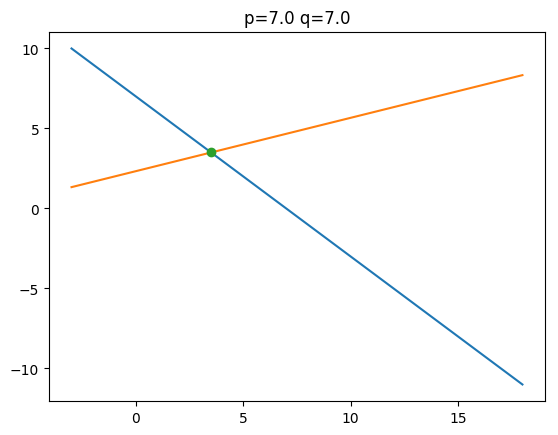

In [2]:
# Execute the code below
f=figure()
x=-3:7:20
@manipulate for p=0:.5:14,q=0:.5:14; withfig(f) do
        plot(x,p-x)
        plot(x,(q+x)/3)
        plot((3*p-q)/4,  (p+q)/4, "o")
        title("p=$p q=$q")
   end
end

## Solution 

The graph shows the solution at x=5, y=2, and we can substitute these values back into the original equations to confirm that they are correct. 

## Problem 6  (GS problem 11 on p. 54)

A system of linear equations can't have exactly two solutions. Why?

(a) If (x,y,z) and (X,Y,Z) are two solutions, what is another solution?

(b) If 25 planes meet at two points, where else do they meet?

## Solution 

A system of linear equations cannot have exactly two solutions. If the vector v is a solution, and the vector w is another solution, then any linear combination av + bw, where a and b are scalars adding up to 1 satisfies the system of linear equations. 

(a) Another solution is ((x+X)/2, (y+Y)/2, (z+Z)/2). 

(b) If the 25 planes meet at two points, they also meet on the entire line through these two points. 

## Problem 7 (GS Problem 18 on p. 55)

Construct a 3 by 3 example that has 9 different coefficients on the left side, but rows 2 and 3 become zero in elimination.  How many solutions to your system with b=(1,10,100) and how many with b=(0,0,0)?


## Solution 

An example of such a matrix is $$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 8 & 12 \\ 5 & 10 & 15 \end{bmatrix}.$$ After eliminating, we go from the system of linear equations $$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 8 & 12 \\ 5 & 10 & 15 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}$$ to $$\begin{bmatrix} 1 & 2 & 3 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 - 4b_1 \\ b_3 - 5b_1 \end{bmatrix}.$$

For $b = (1,10,100)$, the right hand side is $(1, 6, 95)$, which has no solutions since there is no $(x,y,z)$ for which the second equation $0x + 0y + 0z = 6$. For $b=(0,0,0)$, the right hand side is $(0,0,0)$, which has infinitely many solutions, since the second and third equations are always true and $x + 2y + 3z = 0$ has a line of solutions. 

## Problem 8 (GS Problem 27 on p. 56)

Elimination in the usual order gives what matrix U and what
solution to this "lower triangular" system? We are really solving by
*forward* substitution:

$$\begin{matrix}
3x &  &   &   &   & = & 3 \\
6x & + & 2y &   &   & = & 8 \\
9x & - & 2y & + & z & = & 9
\end{matrix}
$$

## Solution 

Pivoting around the first $3$, gives us 
$$\begin{matrix}
3x &  &   &   &   & = & 3 \\
 &  & 2y &   &   & = & 2 \\
 &  & -2y & + & z & = & 0
\end{matrix}
$$

Now pivoting around the middle $2$ gives us 
$$\begin{matrix}
3x &  &   &   &   & = & 3 \\
 &  & 2y &   &   & = & 2 \\
 &  &  & + & z & = & 2
\end{matrix}
$$
Solving each of these equations gives us the solution $x=1, y = 1, z = 2$. 

## Problem 9 (GS Problem 1 on p. 66)

Write down the 3x3 matrices that produce these elimination steps:

(a) $E_{21}$ subtracts 5 times row 1 from row 2

(b) $E_{32}$ subtracts -7 times row 2 from row 3

(c) $P$ exchanges rows 1 and 2, then rows 2 and 3.

## Solution 

(a) $E_{21} = \begin{bmatrix} 1 & 0 & 0 \\ -5 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

(b) $E_{32} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 7 & 1 \end{bmatrix}$ 

(c) $P = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix}  = \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \end{bmatrix}$

## Problem 10: (GS Problem 35 on p. 45)

A 9x9 **Sudoku** matrix $S$ has the numbers 1,...,9 in every row and every column, and in every 3x3 block.  For the all=ones vector $x=(1,\ldots,1)$, what is $Sx$?

A better question is: **Which row exchanges will produce another Sudoku matrix?** Also, which exchanges of block rows give another Sudoku matrix?

## Solution

The values of $Sx$ are the row sums of the Sudoku matrix $S$. Since each row must have the numbers $1,2,\ldots,9$ in it, and these numbers sum to $45$, $Sx$ is the 9x1 matrix with all entries $45$. 

To maintain the property of being a Sudoku matrix, the the matrix must contain the numbers $1,2,\ldots,9$ in each row, column, and $3\times3$ block. Performing a row exchange does not change the set of numbers in each row and column, so the condition we have to worry about is the block condition. A row exchange between two rows in the same set of 3 rows preserves the block property (i.e. exchanging two rows out of the rows $1,2,3$, exchanging two rows out of the rows $4,5,6$, or exchanging two rows out the the rows $7,8,9$). 

In addition, if we consider three blocks of rows $\{1,2,3\}, \{4,5,6\}, \{7,8,9\}$ and exchange any one of these blocks 